 🏨 Hotel Booking Dataset Further Analysis


 Notebook on Google colab: https://colab.research.google.com/drive/1mJ8vL_rhHBtiUcag9TdzvecPb-f4gO9Z?usp=sharing


Importing libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
wr.filterwarnings('ignore')

Reading the dataset, handling the whitespaces, and identifying the outliers

In [63]:
data_file = pd.read_csv("C:\\Users\\Al Badr\\Desktop\\Yousef Mahmoud Ali_ML_GP2\\first inten project.csv")
data_file.columns = [col.strip() for col in data_file.columns]
outliers1 = data_file.select_dtypes(include=['int64', 'float64']).columns.tolist();
print("Numerical columns: " , outliers1)

Numerical columns:  ['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests']


Checking And Handling The Outliers Using IQR Method




number of adults: removed 10175 outliers using IQR Method

number of children: removed 2390 outliers using IQR Method

number of weekend nights: removed 7 outliers using IQR Method

number of week nights: removed 164 outliers using IQR Method

car parking space: removed 650 outliers using IQR Method

lead time: removed 623 outliers using IQR Method

repeated: removed 180 outliers using IQR Method

P-C: removed 0 outliers using IQR Method

P-not-C: removed 0 outliers using IQR Method

average price: removed 531 outliers using IQR Method

special requests: removed 376 outliers using IQR Method


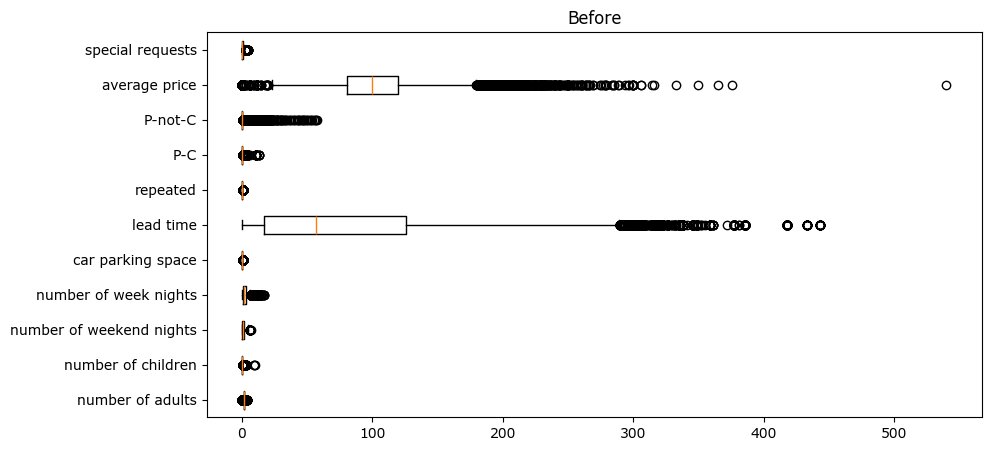

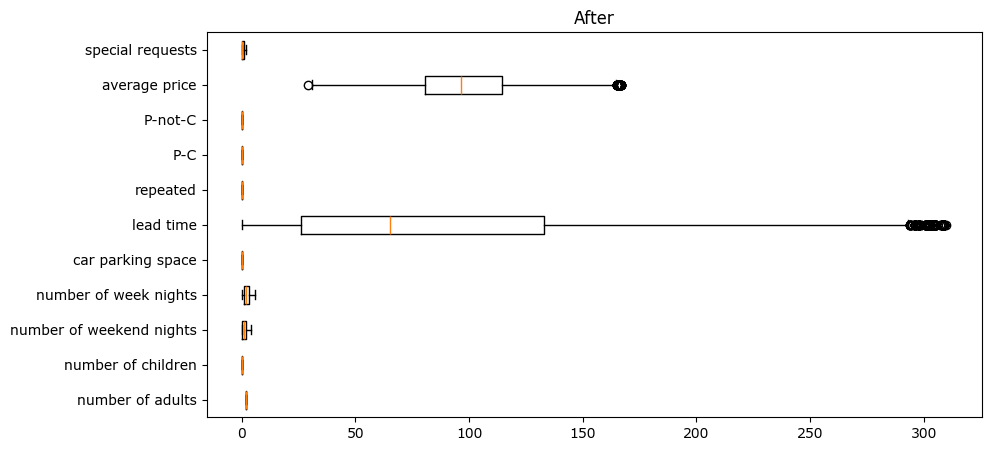

In [64]:
import matplotlib.pyplot as y1
import numpy as np

before_data = data_file.copy();

def IQR_METHOD(data , col):
    Q1 = data[col].quantile(0.25);
    Q3 = data[col].quantile(0.75);
    IQR = Q3 - Q1;
    lower_bound = Q1 - (1.5 * IQR);
    upper_bound = Q3 + (1.5 * IQR);
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
print("\n")
for col in outliers1: 
    before_removing = data_file.shape[0];
    data_file = IQR_METHOD(data_file, col)
    after_removing = data_file.shape[0];
    print(f"\n{col}: removed {before_removing - after_removing} outliers using IQR Method")


y1.figure(figsize=(10,5))
y1.title("Before")
y1.boxplot(before_data[outliers1].values, labels=outliers1, vert=False)
plt.show();

y1.figure(figsize=(10,5))
y1.title("After")
y1.boxplot(data_file[outliers1].values ,labels = outliers1, vert=False)
y1.show()

Data Overview & Data Types

In [65]:
print("Shape: " , data_file.shape)
print("First 5 rows: "); print(data_file.head());
print("Data types: "); print(data_file.dtypes);
print("Nulls:\n" , data_file.isnull().sum())

Shape:  (21189, 17)
First 5 rows: 
   Booking_ID  number of adults  number of children  number of weekend nights  \
12   INN00013                 2                   0                         2   
14   INN00015                 2                   0                         0   
15   INN00016                 2                   0                         0   
17   INN00018                 2                   0                         1   
18   INN00019                 2                   0                         2   

    number of week nights  type of meal  car parking space    room type  \
12                      1  Not Selected                  0  Room_Type 1   
14                      2   Meal Plan 1                  0  Room_Type 1   
15                      2   Meal Plan 2                  0  Room_Type 1   
17                      3  Not Selected                  0  Room_Type 1   
18                      2   Meal Plan 1                  0  Room_Type 1   

    lead time market segmen

Heatmap to identify some correlations

And determining the Feature Engineering ( Feature Selection Feature Extraction)


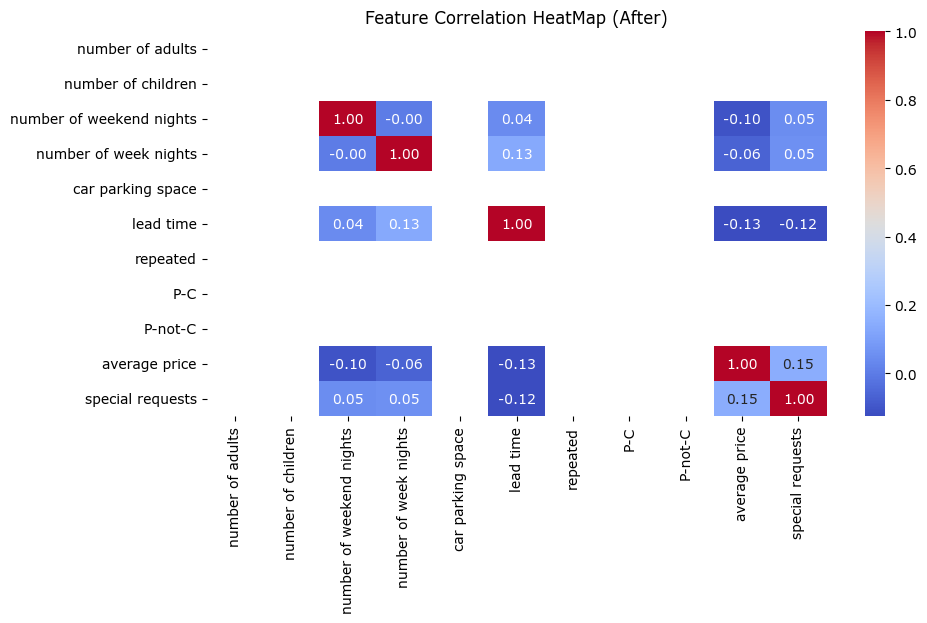

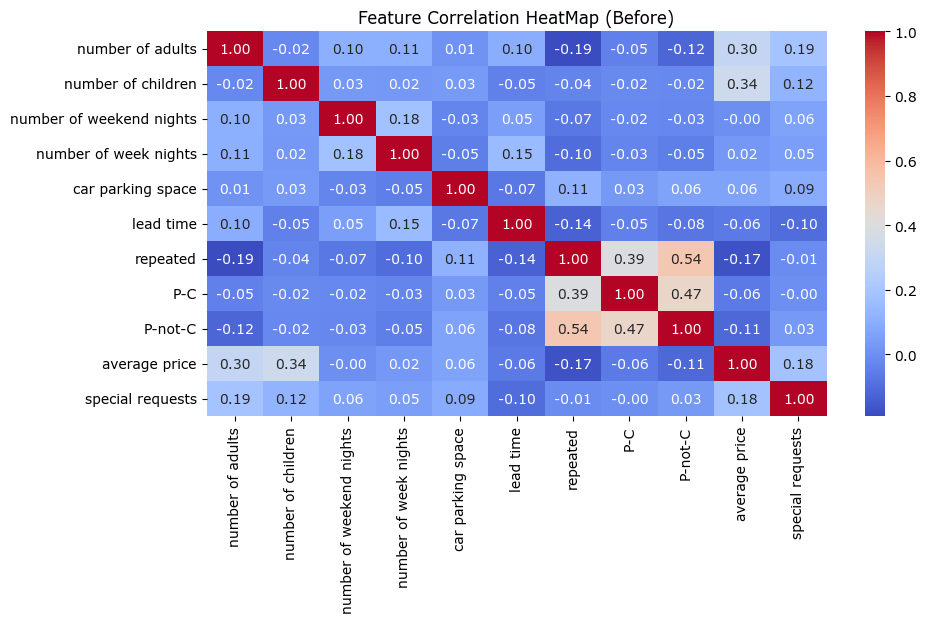

In [66]:
plt.figure(figsize=(10,5))
sns.heatmap(data_file.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap = "coolwarm", fmt=".2f")
plt.title("Feature Correlation HeatMap (After)")
plt.show()
plt.figure(figsize=(10,5))
sns.heatmap(before_data.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap = "coolwarm", fmt=".2f")
plt.title("Feature Correlation HeatMap (Before)")
plt.show()

In [67]:
data_file = data_file.drop(columns=['repeated', 'P-not-C' , 'car parking space' , 'number of week nights'])

cat_col = data_file.select_dtypes(include=['object', 'category']).columns.tolist();
print("Categorical columns: " , cat_col);
for col in cat_col:
    data_file[col] = data_file[col].str.strip()

data_file['date of reservation'] = pd.to_datetime(data_file['date of reservation'], errors='coerce')
data_file['reservation_month'] = data_file['date of reservation'].dt.to_period("M")
data_file['reservation_day'] = data_file['date of reservation'].dt.day
data_file['reservation_weekday'] = data_file['date of reservation'].dt.dayofweek

Categorical columns:  ['Booking_ID', 'type of meal', 'room type', 'market segment type', 'date of reservation', 'booking status']


Encoding Categorical Features

- Utilized **Label Encoding** to [ booking status ] (our target) to convert [ Canceled ] and [ Not_Canceled ] into 0's and 1's.
- Applied **One-Hot Encoding** on categorical features ( type of meal ,  room type , and  market segment type ) to convert them into numerical format for model compatibility.


In [68]:
data_file = data_file.dropna()
encode = LabelEncoder()
data_file = pd.get_dummies(data_file , columns=['type of meal', 'room type', 'market segment type'], drop_first=True)#One-Hot
data_file['booking status'] = encode.fit_transform(data_file['booking status'])#label encoding

Train-Test Split & Logistic Regression Model

In [69]:
X = data_file.drop(columns=['booking status','Booking_ID', 'date of reservation' , 'reservation_month'])
Y = data_file['booking status']

X_train, X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.2, random_state=30)
print("Training set: " , X_train.shape)
print("Test split: " , X_test.shape)
Model = LogisticRegression(max_iter=2000)
Model.fit(X_train , Y_train)
y_predict = Model.predict(X_test)
Acc = accuracy_score(Y_test , y_predict)
print("Accuracy: " , round(Acc * 100, 2), "%")
print("Classifications report:",classification_report(Y_test , y_predict))
print("Confusion matrix:",confusion_matrix(Y_test , y_predict))

Training set:  (16942, 21)
Test split:  (4236, 21)
Accuracy:  81.09 %
Classifications report:               precision    recall  f1-score   support

           0       0.77      0.65      0.71      1477
           1       0.83      0.90      0.86      2759

    accuracy                           0.81      4236
   macro avg       0.80      0.77      0.78      4236
weighted avg       0.81      0.81      0.81      4236

Confusion matrix: [[ 959  518]
 [ 283 2476]]


## Final Thoughts

 **About 80% accuracy** was achieved by the logistic regression model to predict cancellations of reservations.
 The aim was strongly correlated with features including **lead time**, **special requests**, and **reservation day**.

 Complied with the necessary procedures:
   1. Data preparation and cleaning  
   2. Using IQR to remove outliers  
   3. Engineering features  
   4. Transformation in categories  
   5. Train-test separation  
   6. Model of binary categorization  
   7. Metrics for evaluation



## 🔍 Confusion Matrix Visualization

To better understand the model's performance, I have visualized the **confusion matrix**, which shows the number of:
- **True Positives (TP)**: Correctly predicted `Not_Canceled` bookings
- **True Negatives (TN)**: Correctly predicted `Canceled` bookings
- **False Positives (FP)**: Incorrectly predicted `Not_Canceled` when it was actually `Canceled`
- **False Negatives (FN)**: Incorrectly predicted `Canceled` when it was actually `Not_Canceled`

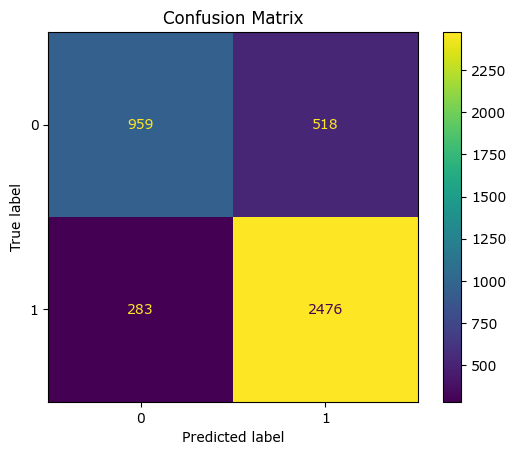

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(Model, X_test, Y_test)
plt.title("Confusion Matrix")
plt.show()